Comparisons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,12)

In [3]:
airbnb = pd.read_pickle("data/airbnb.3.grouped.pkl")

In [4]:
airbnb.dtypes

room_id                         int64
host_id                         int64
room_type                      object
neighborhood                   object
overall_satisfaction          float64
accommodates                    int64
bedrooms                      float64
price                         float64
area_popularity                object
price_type                   category
accommodation_type           category
overall_satisfaction_type    category
dtype: object

In [5]:
airbnb.head()

,room_id,host_id,room_type,neighborhood,overall_satisfaction,accommodates,bedrooms,price,area_popularity,price_type,accommodation_type,overall_satisfaction_type
0,6499,14455,Entire home/apt,Belém,5.0,2,1.0,57.0,Decently_popular_area,medium,low,Great
1,17031,66015,Entire home/apt,Alvalade,0.0,2,1.0,46.0,Decently_popular_area,medium,low,Poor/No_reviews
2,25659,107347,Entire home/apt,Santa Maria Maior,5.0,3,1.0,69.0,Very_popular_area,high,medium,Great
3,29248,125768,Entire home/apt,Santa Maria Maior,4.5,4,1.0,58.0,Very_popular_area,medium,medium,Fair
4,29396,126415,Entire home/apt,Santa Maria Maior,5.0,4,1.0,67.0,Very_popular_area,high,medium,Great


In [6]:
from ipywidgets import interact, fixed

Multiple group counts

In [7]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [8]:
area_popularity_by_price = pivot_count(airbnb, "price_type","area_popularity", "price")
area_popularity_by_price

area_popularity,Decently_popular_area,Less_popular_area,Not_popular_area,Very_popular_area
price_type,,,,
medium,997.0,238.0,144.0,1966.0
high,734.0,219.0,108.0,2239.0
very high,626.0,249.0,73.0,2470.0
low,525.0,250.0,59.0,2335.0


In [11]:
def means_by_category(col_group, col_calc):
    airbnb_no_outliers = airbnb[airbnb[col_calc]<airbnb[col_calc].quantile(0.99)]
    airbnb_no_outliers.groupby(col_group)[col_calc].mean().plot.barh()   
    plt.ylabel(col_group)
    plt.xlabel('Mean values for variable {}'.format(col_calc))
    plt.show()

In [12]:
numerical_variables = airbnb.select_dtypes(np.number).columns
categorical_variables = airbnb.select_dtypes(['object', 'category']).columns
columns_type = [col for col in airbnb.columns if col.endswith("_type")]

In [13]:
interact(means_by_category, col_group=categorical_variables, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_group', options=('room_type', 'neighborhood', 'area_popularity…

-Parque das Nacoes is the neighborhood with the most expensive locations available.

-As expected, places in Santa Maria Maior and Misericordia both have the highest overall satisfaction, thus explaining why they are also the most popular among consumers.

In [16]:
def pivot_mean(rows, columns, calc_field):
    df_pivot = airbnb.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.mean
                             ).dropna(axis=0, how='all')
    return df_pivot

In [19]:
pivot_mean("room_type","area_popularity", "price")

area_popularity,Decently_popular_area,Less_popular_area,Not_popular_area,Very_popular_area
room_type,,,,
Entire home/apt,109.631968,125.456456,153.595420,95.074456
Private room,43.686512,53.865724,47.862069,45.355458
Shared room,29.224490,59.714286,19.000000,35.944954


Conclusions: 
-As expected, entire homes/apartments have higher average prices

-The price is relatively lower for entries in very popular areas, showing that the lower cost is perhaps a strong incentive for the consumers to rent them.

-Entire homes/apartments in the least popular areas are the most expensive on average, thus indicating that most airbnb consumers in Lisbon would vastly prefer cheaper options on more popular areas

Trend Comparison Based on Price Changes

In [30]:
airbnb_price = airbnb.query("price")

In [31]:
def mean_trend(col_calc):
    airbnb_price.groupby('price')[col_calc].mean().plot()
    plt.ylabel(col_calc)
    plt.title("{} change based on price".format(col_calc))
    plt.show()

In [32]:
interact(mean_trend, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_calc', options=('room_id', 'host_id', 'overall_satisfaction', …

It is notable that price generally increases based on the rise of accomodation space.

Correlations

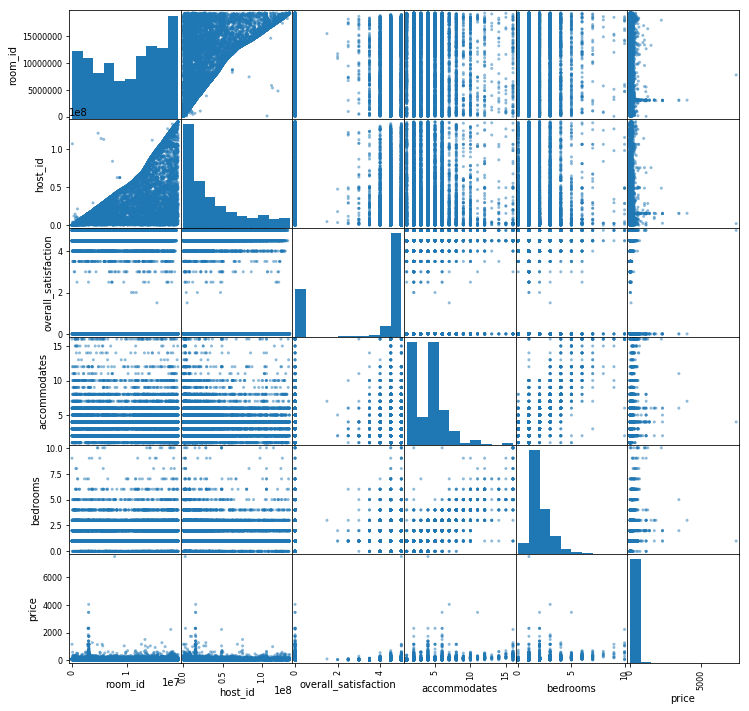

In [33]:
pd.plotting.scatter_matrix(airbnb.select_dtypes([int, float]));

In [34]:
airbnb.corr()

,room_id,host_id,overall_satisfaction,accommodates,bedrooms,price
room_id,1.000000,0.595750,-0.308531,-0.057226,-0.030635,-0.068688
host_id,0.595750,1.000000,-0.179272,-0.071530,-0.050984,-0.048030
overall_satisfaction,-0.308531,-0.179272,1.000000,0.078356,0.019189,-0.126767
accommodates,-0.057226,-0.071530,0.078356,1.000000,0.791061,0.300386
bedrooms,-0.030635,-0.050984,0.019189,0.791061,1.000000,0.302463
price,-0.068688,-0.048030,-0.126767,0.300386,0.302463,1.000000


The variable pairs price and accommodates and price and bedrooms have a positive correlation.

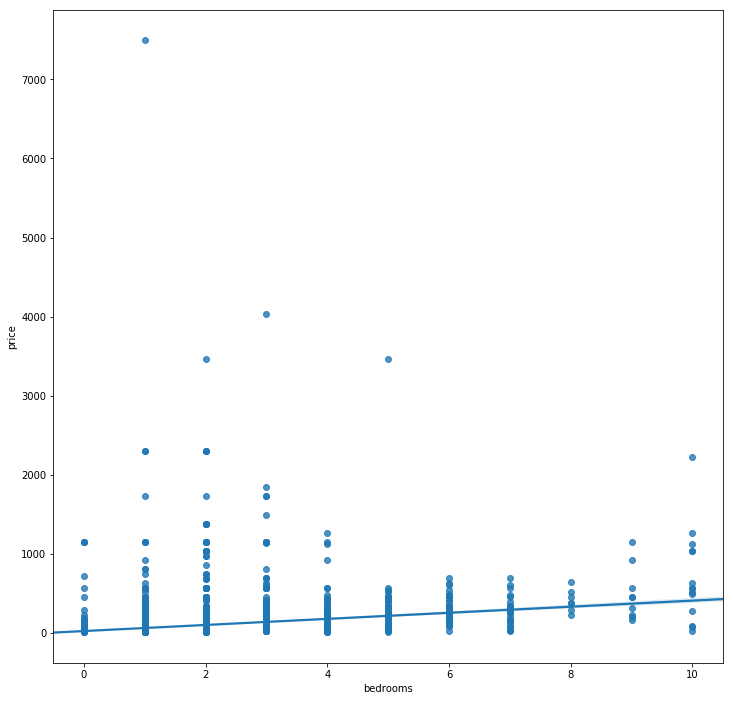

In [37]:
sns.regplot("bedrooms", "price", data=airbnb);

Based on the numerical variables, price, bedrooms, and accomodations in any pair have a reasonable and expected positive correlation. More bedrooms would mean more space for accomodation and higher prices.